# Plot sinogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
plt.rcParams.update({'font.size': 16})

In [27]:
def plot_sinogram_slice(im, slice):
    sinogram = np.moveaxis(im, 0, -1)
    dx, dy = 0.5 * 180.0 / max(im.shape), 0.5 / sinogram.shape[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

    ax1.imshow(im[0], cmap=plt.cm.Greys_r)
#     ax1.set_title('Projection image (front)')
    ax1.axhline(y = slice, color = 'cyan', linestyle = '--')
    ax1.xaxis.set_major_locator(plt.NullLocator())
    ax1.yaxis.set_major_locator(plt.NullLocator())

#     ax2.set_title(f"Sinogram (slice {slice})")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.yaxis.set_major_locator(plt.NullLocator())
#     ax2.set_ylabel("Projection position (pixels)")
    plt.imshow(sinogram[slice], cmap=plt.cm.Greys_r,
            extent=(-dx, 360.0 + dx, sinogram[slice].shape[0] + dy, -dy),
            aspect='auto', origin='upper')
    
    fig.tight_layout()

In [28]:
im = io.imread(r'D:\MSci_Project\1_Data\2023-03-20\2023-03-20 embryo fluorescence fe 1750ms\MMStack_Pos0.ome.tif')
bg = io.imread(r'D:\MSci_Project\1_Data\2023-03-20\2023-03-20 background fluorescence fe 1750ms\MMStack_Pos0.ome.tif')
bg = np.mean(bg, axis=0)
im = im.astype('float64')
im -= bg.astype('float64')
im = im[:, 200:1000, 250:800]

In [29]:
im.shape

(400, 800, 550)

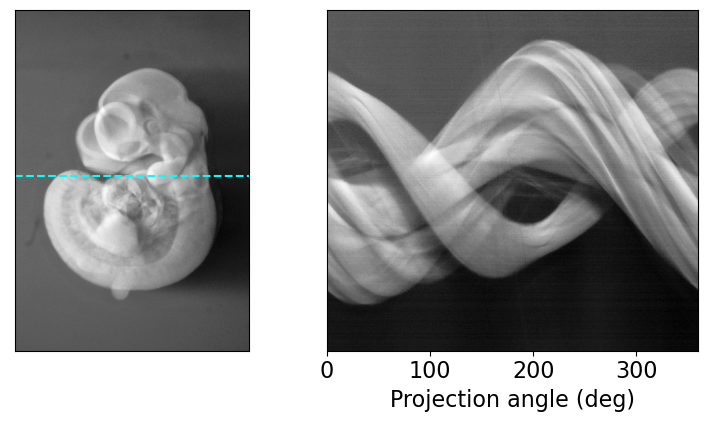

In [30]:
plot_sinogram_slice(im, 390)
plt.savefig('sinogram.png', transparent=True, dpi=300)

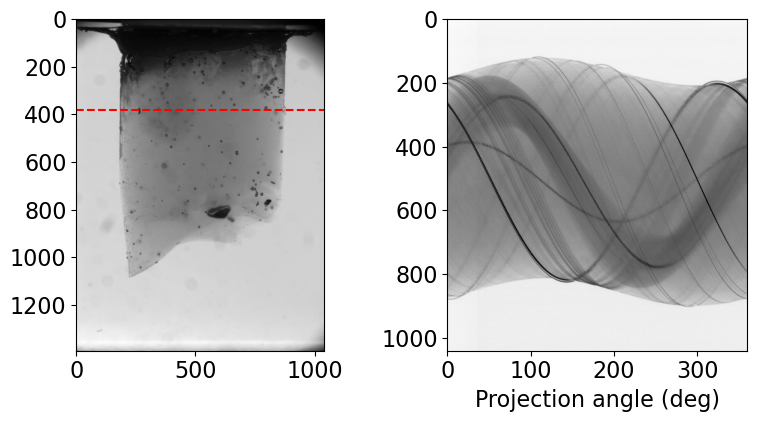

In [27]:
im = io.imread(r'D:\MSci_Project\1_Data\2022-12-01 broken phantom\1_2\1_2_MMStack_Pos0.ome.tif')
plot_sinogram_slice(im, 380)

In [28]:
# im = io.imread(r'D:\MSci_Project\1_Data\MSc_OPT_test_data_aligned.tif')

In [29]:
# # adapted from https://stackoverflow.com/a/19476891

# import visvis as vv

# imgdata = np.rot90(im[0], 3)

# nr, nc = imgdata.shape[:2]
# x,y = np.mgrid[:nr, :nc]
# z = np.ones((nr, nc))

# for ii in range(5):
#     vv.functions.surf(x, z*ii*100, y, imgdata, aa=3)

# app = vv.use()
# app.Run()

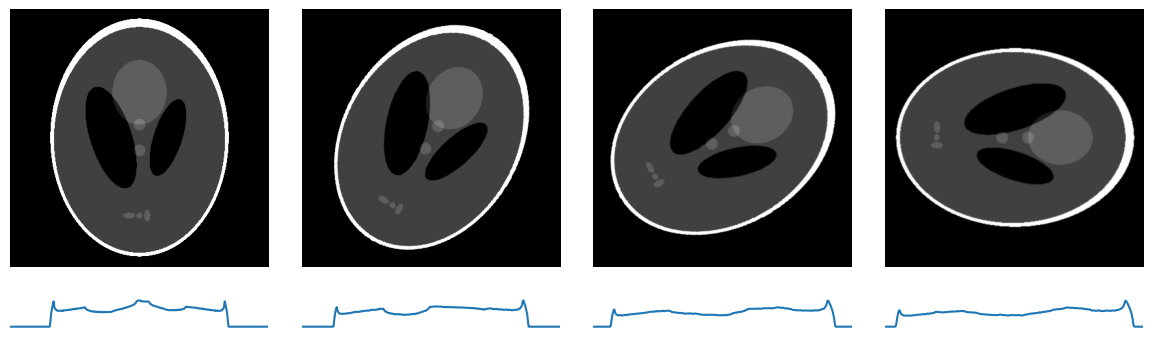

In [92]:
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
from matplotlib.gridspec import GridSpec
import cv2

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, -angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

image = shepp_logan_phantom()

fig, axes = plt.subplots(nrows=2, ncols=4, sharex='col', sharey=False,
                               gridspec_kw={'height_ratios': [10, 1]},
                               figsize=(12, 4))
fig.set_tight_layout({'rect': [0, 0, 1, 1], 'pad': 1.5, 'h_pad': 1.5})

axes[0][0].imshow(image, cmap=plt.cm.Greys_r)
axes[1][0].plot(np.sum(image, axis=0))

ANGLE = 30

image = rotate_image(image, ANGLE)
axes[0][1].imshow(image, cmap=plt.cm.Greys_r)
axes[1][1].plot(np.sum(image, axis=0))

image = rotate_image(image, ANGLE)
axes[0][2].imshow(image, cmap=plt.cm.Greys_r)
axes[1][2].plot(np.sum(image, axis=0))

image = rotate_image(image, ANGLE)
axes[0][3].imshow(image, cmap=plt.cm.Greys_r)
axes[1][3].plot(np.sum(image, axis=0))

for axs in axes:
    for ax in axs:
        ax.axis('off')

plt.savefig('projections.png', transparent=True, dpi=300)
plt.show()

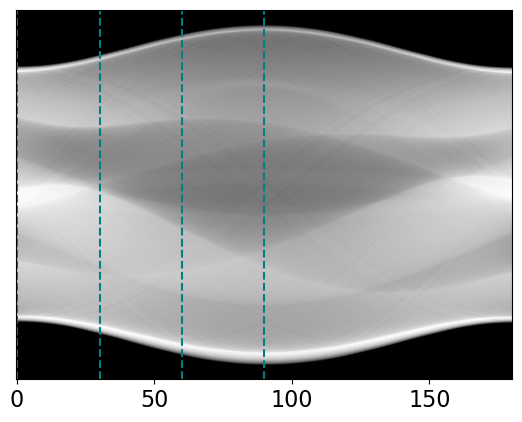

In [103]:
from skimage.transform import radon

image = shepp_logan_phantom()

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]


plt.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

plt.gca().yaxis.set_major_locator(plt.NullLocator())


for angle in [0, 30, 60, 90]:
    plt.axvline(x=angle, linestyle='--', color='teal')



plt.savefig('shepplogan_sino.png', transparent=True, dpi=300)
plt.show()